In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json
from datetime import datetime
import random
import seaborn as sns

In [2]:
file_path = f'data/yahoo/merged_selected_financials.json'
with open(file_path, 'r') as json_file:
    yahoo_financials = json.load(json_file)

In [3]:
position_types_selected_for_analysis = {}
position_types_selected_for_analysis['quarterly_income'] = [
    'totalRevenue',
    'totalExpenses',
    'grossProfit',
    'netIncome',
    'ebit',
    'eBITDA',
    'operatingRevenue',
    'operatingIncome',
    'dilutedEPS',
]
position_types_selected_for_analysis['quarterly_balance'] = [
    'totalAssets',
    'totalLiabilitiesNetMinorityInterest',
    'totalDebt',
    'ordinarySharesNumber',
    'commonStockEquity',
    'tangibleBookValue',
    'investedCapital',
]
position_types_selected_for_analysis['quarterly_cashflow'] = [
    'operatingCashFlow',
    'investingCashFlow',
    'financingCashFlow',
    'freeCashFlow',
]
position_types_selected_for_analysis['annual_income'] = [
    'totalRevenue',
    'totalExpenses',
    'grossProfit',
    'netIncome',
    'ebit',
    'eBITDA',
    'operatingRevenue',
    'operatingIncome',
    'dilutedEPS',
]
position_types_selected_for_analysis['annual_balance'] = [
    'totalAssets',
    'totalLiabilitiesNetMinorityInterest',
    'totalDebt',
    'ordinarySharesNumber',
    'commonStockEquity',
    'tangibleBookValue',
    'investedCapital',
]
position_types_selected_for_analysis['annual_cashflow'] = [
    'operatingCashFlow',
    'investingCashFlow',
    'financingCashFlow',
    'freeCashFlow',
]

In [4]:
tickers = list(yahoo_financials.keys())

In [5]:
# Creae dataframes for quarterly and annual financials
quarterly_income_df = pd.DataFrame()
quarterly_balance_df = pd.DataFrame()
quarterly_cashflow_df = pd.DataFrame()
annual_income_df = pd.DataFrame()
annual_balance_df = pd.DataFrame()
annual_cashflow_df = pd.DataFrame()

for ticker in tickers:
    for statement in yahoo_financials[ticker]['quarterly_income']:
        for timestamp in statement:
            new_row = {'ticker': ticker, 'timestamp': timestamp} | statement[timestamp] 
            quarterly_income_df = pd.concat([quarterly_income_df, pd.DataFrame(new_row, index=[0])], ignore_index=True)
    for statement in yahoo_financials[ticker]['quarterly_balance']:
        for timestamp in statement:
            new_row = {'ticker': ticker, 'timestamp': timestamp} | statement[timestamp] 
            quarterly_balance_df = pd.concat([quarterly_balance_df, pd.DataFrame(new_row, index=[0])], ignore_index=True)
    for statement in yahoo_financials[ticker]['quarterly_cashflow']:
        for timestamp in statement:
            new_row = {'ticker': ticker, 'timestamp': timestamp} | statement[timestamp] 
            quarterly_cashflow_df = pd.concat([quarterly_cashflow_df, pd.DataFrame(new_row, index=[0])], ignore_index=True)
    for statement in yahoo_financials[ticker]['annual_income']:
        for timestamp in statement:
            new_row = {'ticker': ticker, 'timestamp': timestamp} | statement[timestamp] 
            annual_income_df = pd.concat([annual_income_df, pd.DataFrame(new_row, index=[0])], ignore_index=True)
    for statement in yahoo_financials[ticker]['annual_balance']:
        for timestamp in statement:
            new_row = {'ticker': ticker, 'timestamp': timestamp} | statement[timestamp] 
            annual_balance_df = pd.concat([annual_balance_df, pd.DataFrame(new_row, index=[0])], ignore_index=True)
    for statement in yahoo_financials[ticker]['annual_cashflow']:
        for timestamp in statement:
            new_row = {'ticker': ticker, 'timestamp': timestamp} | statement[timestamp] 
            annual_cashflow_df = pd.concat([annual_cashflow_df, pd.DataFrame(new_row, index=[0])], ignore_index=True)

In [6]:
quarterly_income_corr = quarterly_income_df[position_types_selected_for_analysis['quarterly_income']].corr()
quarterly_balance_corr = quarterly_balance_df[position_types_selected_for_analysis['quarterly_balance']].corr()
quarterly_cashflow_corr = quarterly_cashflow_df[position_types_selected_for_analysis['quarterly_cashflow']].corr()
annual_income_corr = annual_income_df[position_types_selected_for_analysis['annual_income']].corr()
annual_balance_corr = annual_balance_df[position_types_selected_for_analysis['annual_balance']].corr()
annual_cashflow_corr = annual_cashflow_df[position_types_selected_for_analysis['annual_cashflow']].corr()

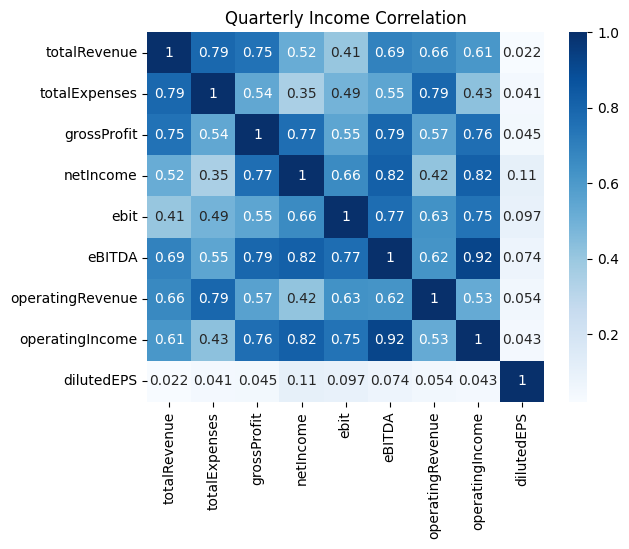

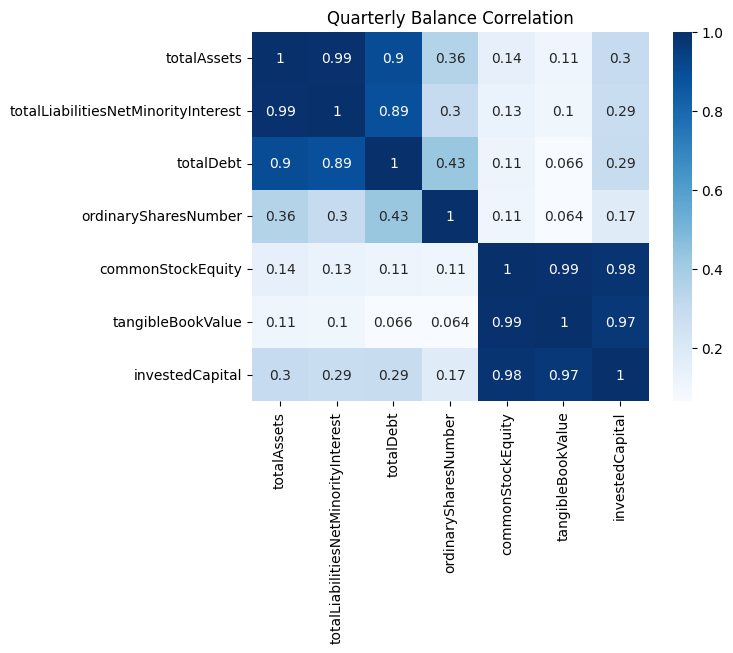

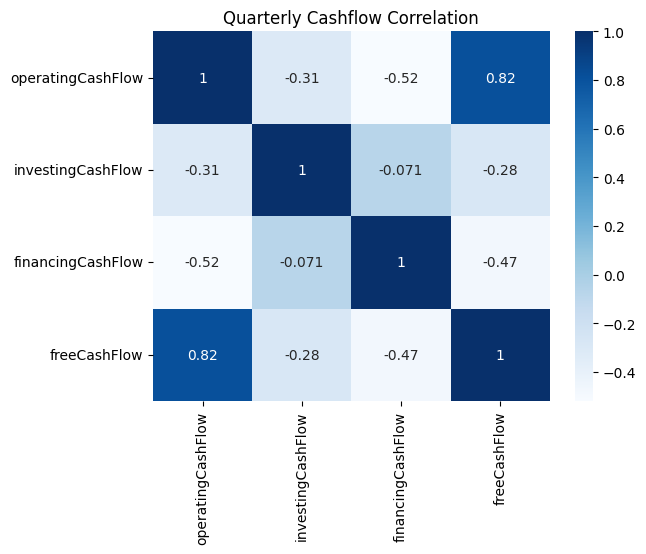

In [7]:
sns.heatmap(quarterly_income_corr, annot=True, cmap='Blues')
plt.title('Quarterly Income Correlation')
plt.show()

sns.heatmap(quarterly_balance_corr, annot=True, cmap='Blues')
plt.title('Quarterly Balance Correlation')
plt.show()

sns.heatmap(quarterly_cashflow_corr, annot=True, cmap='Blues')
plt.title('Quarterly Cashflow Correlation')
plt.show()

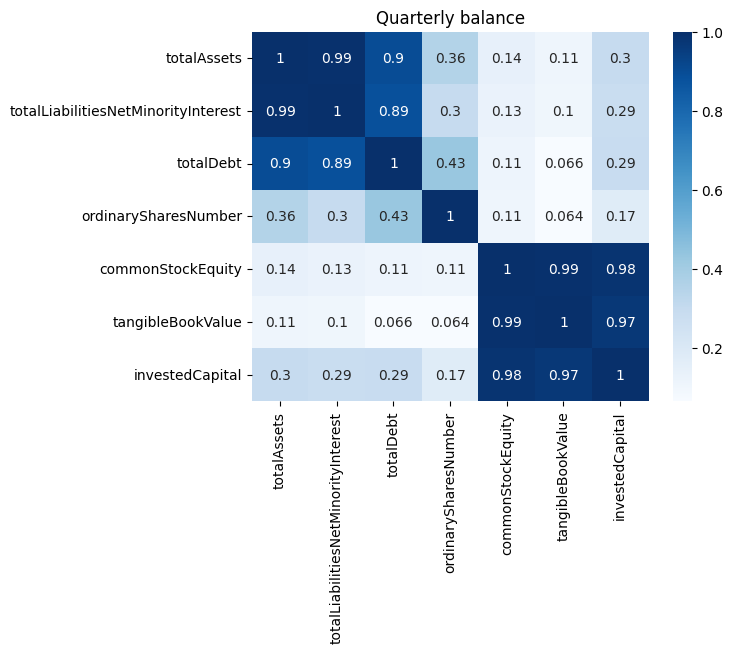

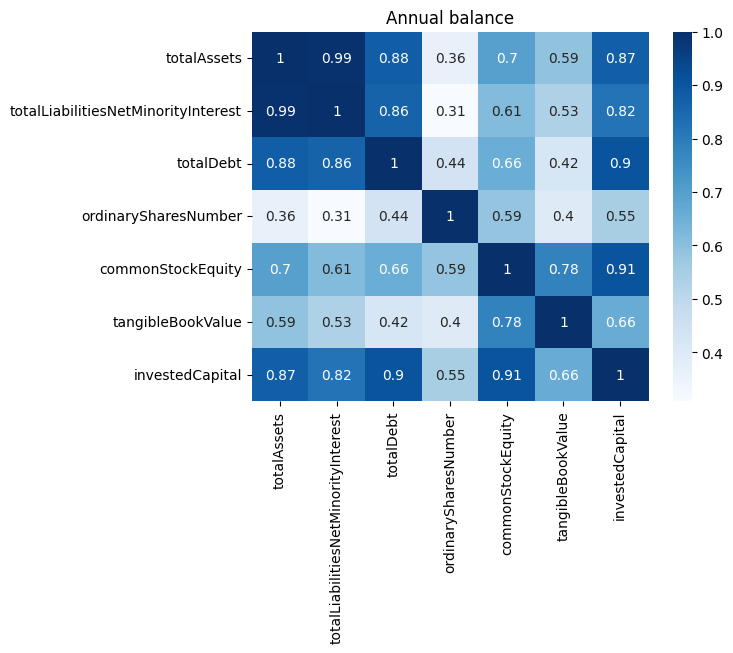

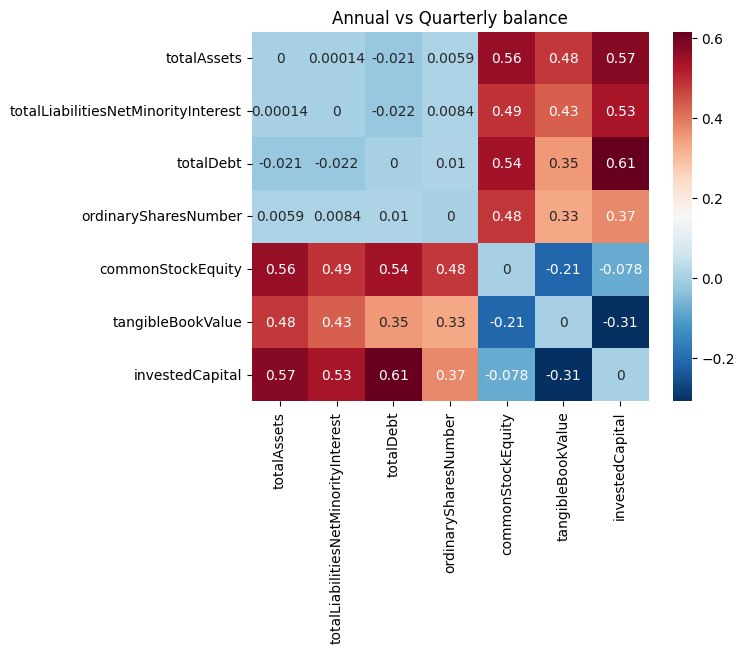

In [8]:
sns.heatmap(quarterly_balance_corr, annot=True, cmap="Blues")
plt.title("Quarterly balance")
plt.show()

sns.heatmap(annual_balance_corr, annot=True, cmap="Blues")
plt.title("Annual balance")
plt.show()

b_diff = annual_balance_corr - quarterly_balance_corr
sns.heatmap(b_diff, annot=True, cmap="RdBu_r")
plt.title("Annual vs Quarterly balance")
plt.show()

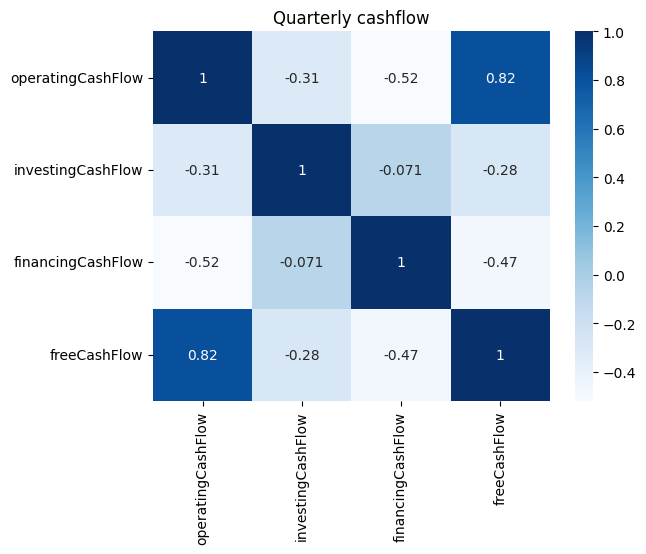

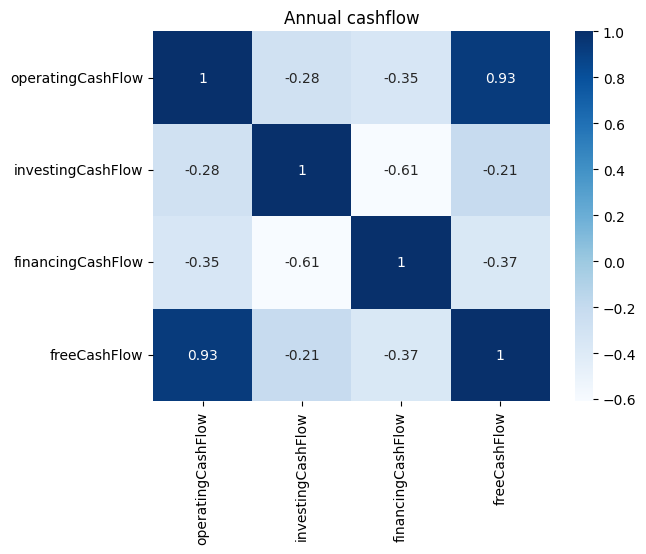

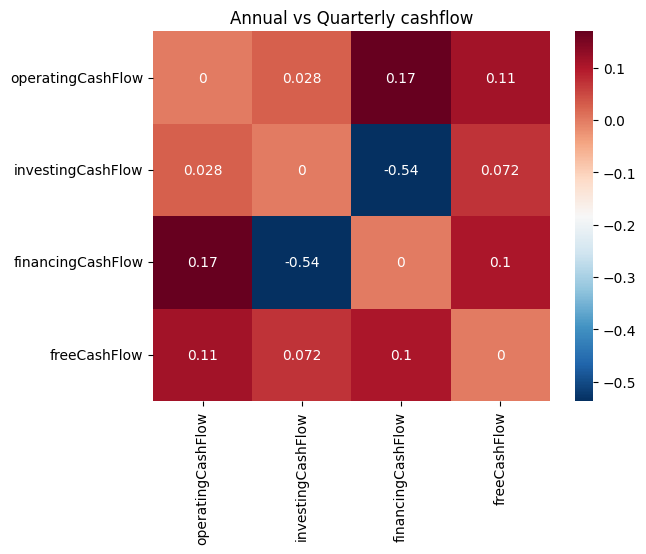

In [9]:
sns.heatmap(quarterly_cashflow_corr, annot=True, cmap="Blues")
plt.title("Quarterly cashflow")
plt.show()

sns.heatmap(annual_cashflow_corr, annot=True, cmap="Blues")
plt.title("Annual cashflow")
plt.show()

c_diff = annual_cashflow_corr - quarterly_cashflow_corr
sns.heatmap(c_diff, annot=True, cmap="RdBu_r")
plt.title("Annual vs Quarterly cashflow")
plt.show()

In [10]:
# Łączenie kategorii do jednego datasetu

quarter_df = pd.DataFrame()
annual_df = pd.DataFrame()

for ticker in tickers:
    for statement in yahoo_financials[ticker]['quarterly_income']:
      for timestamp in statement:
        rec_df = pd.DataFrame()

        rec_df['timestamp'] = [timestamp]
        rec_df['ticker'] = [ticker]
        for pos in position_types_selected_for_analysis['quarterly_income']:
          rec_df[pos] = [statement[timestamp].get(pos)]

        for rec in yahoo_financials[ticker]['quarterly_balance']:
          for time in rec:
            if time == timestamp:
              for pos in position_types_selected_for_analysis['quarterly_balance']:
                rec_df[pos] = [rec[time].get(pos)]

        for rec in yahoo_financials[ticker]['quarterly_cashflow']:
          for time in rec:
            if time == timestamp:
              for pos in position_types_selected_for_analysis['quarterly_cashflow']:
                rec_df[pos] = [rec[time].get(pos)]

        quarter_df = pd.concat([quarter_df, rec_df], ignore_index=True)

    for statement in yahoo_financials[ticker]['annual_income']:
        for timestamp in statement:
          rec_df = pd.DataFrame()

          rec_df['timestamp'] = [timestamp]
          rec_df['ticker'] = [ticker]
          for pos in position_types_selected_for_analysis['annual_income']:
            rec_df[pos] = [statement[timestamp].get(pos)]

          for rec in yahoo_financials[ticker]['annual_balance']:
            for time in rec:
              if time == timestamp:
                for pos in position_types_selected_for_analysis['annual_balance']:
                  rec_df[pos] = [rec[time].get(pos)]
          for rec in yahoo_financials[ticker]['annual_cashflow']:
            for time in rec:
              if time == timestamp:
                for pos in position_types_selected_for_analysis['annual_cashflow']:
                  rec_df[pos] = [rec[time].get(pos)]
          annual_df = pd.concat([annual_df, rec_df], ignore_index=True)


In [11]:
quarter_df

,timestamp,ticker,totalRevenue,totalExpenses,grossProfit,netIncome,ebit,eBITDA,operatingRevenue,operatingIncome,...,totalLiabilitiesNetMinorityInterest,totalDebt,ordinarySharesNumber,commonStockEquity,tangibleBookValue,investedCapital,operatingCashFlow,investingCashFlow,financingCashFlow,freeCashFlow
0,1690754400,A,1.672000e+09,1.539000e+09,6.580000e+08,111000000.0,1.470000e+09,2.270000e+08,1.672000e+09,133000000.0,...,5.117000e+09,2.789000e+09,292747000.0,5.558000e+09,1.072000e+09,8.347000e+09,1.704000e+09,-89000000.0,-1.070000e+09,1.420000e+09
1,1667170800,A,1.849000e+09,1.378000e+09,1.012000e+09,368000000.0,4.780000e+08,5.510000e+08,1.849000e+09,471000000.0,...,5.227000e+09,2.769000e+09,295000000.0,5.289000e+09,5.160000e+08,8.058000e+09,4.480000e+08,-110000000.0,-3.410000e+08,3.780000e+08
2,1675119600,A,1.756000e+09,1.330000e+09,9.680000e+08,352000000.0,4.350000e+08,5.020000e+08,1.756000e+09,426000000.0,...,5.310000e+09,2.971000e+09,296000000.0,5.609000e+09,8.160000e+08,8.580000e+09,2.960000e+08,-104000000.0,-1.700000e+07,2.200000e+08
3,1682805600,A,1.717000e+09,1.334000e+09,9.240000e+08,302000000.0,4.010000e+08,4.720000e+08,1.717000e+09,383000000.0,...,5.011000e+09,2.733000e+09,295000000.0,5.781000e+09,1.003000e+09,8.514000e+09,3.980000e+08,-77000000.0,-3.900000e+08,3.410000e+08
4,1664488800,AAL,1.346200e+10,1.253200e+10,2.824000e+09,483000000.0,1.157000e+09,1.157000e+09,1.267500e+10,930000000.0,...,7.454500e+10,4.468200e+10,649863026.0,-7.893000e+09,-1.405300e+10,2.904100e+10,-5.930000e+08,784000000.0,-2.520000e+08,-1.166000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,1664488800,ZTS,2.002000e+09,1.279000e+09,1.395000e+09,529000000.0,7.200000e+08,8.350000e+08,2.002000e+09,723000000.0,...,9.012000e+09,6.749000e+09,466442095.0,4.663000e+09,6.520000e+08,1.122600e+10,5.260000e+08,-124000000.0,-5.290000e+08,3.720000e+08
2142,1672441200,ZTS,2.040000e+09,1.350000e+09,1.387000e+09,461000000.0,6.540000e+08,6.890000e+08,2.040000e+09,690000000.0,...,1.052200e+10,8.090000e+09,463808059.0,4.405000e+09,2.790000e+08,1.230900e+10,7.410000e+08,-438000000.0,7.800000e+08,5.700000e+08
2143,1680213600,ZTS,2.000000e+09,1.272000e+09,1.412000e+09,552000000.0,7.600000e+08,7.970000e+08,2.000000e+09,728000000.0,...,9.263000e+09,6.742000e+09,462495343.0,4.494000e+09,4.420000e+08,1.105600e+10,5.490000e+08,-216000000.0,-1.802000e+09,3.260000e+08
2144,1688076000,ZTS,2.180000e+09,1.346000e+09,1.573000e+09,671000000.0,9.300000e+08,9.670000e+08,2.180000e+09,834000000.0,...,9.128000e+09,6.745000e+09,460750652.0,4.625000e+09,6.590000e+08,1.118200e+10,1.830000e+08,-80000000.0,-4.940000e+08,1.700000e+07


In [12]:
quarter_corr = quarter_df[quarter_df.columns[2:]].corr()
annual_corr = annual_df[annual_df.columns[2:]].corr()

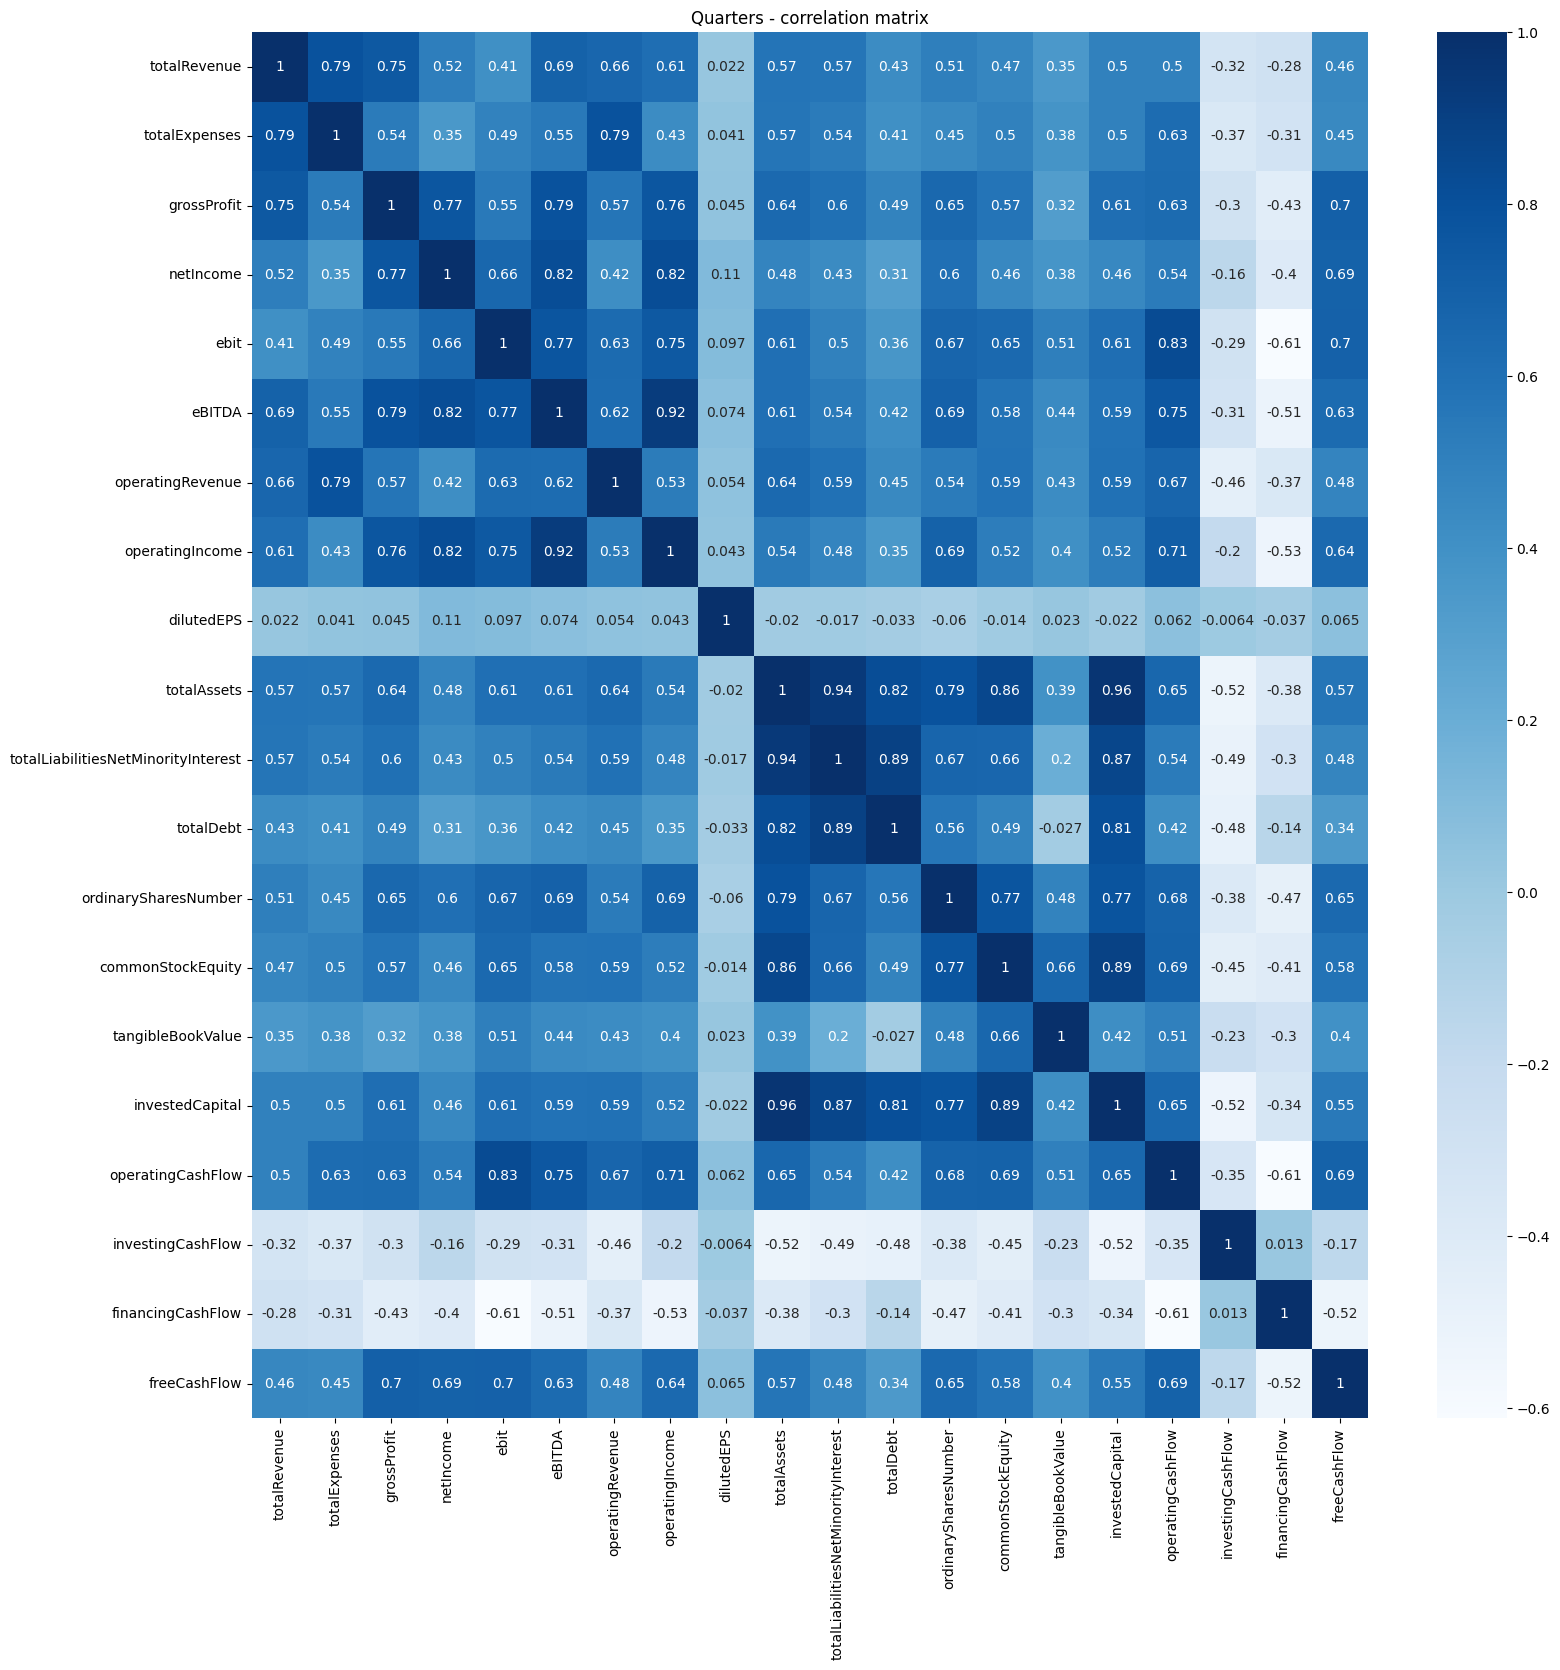

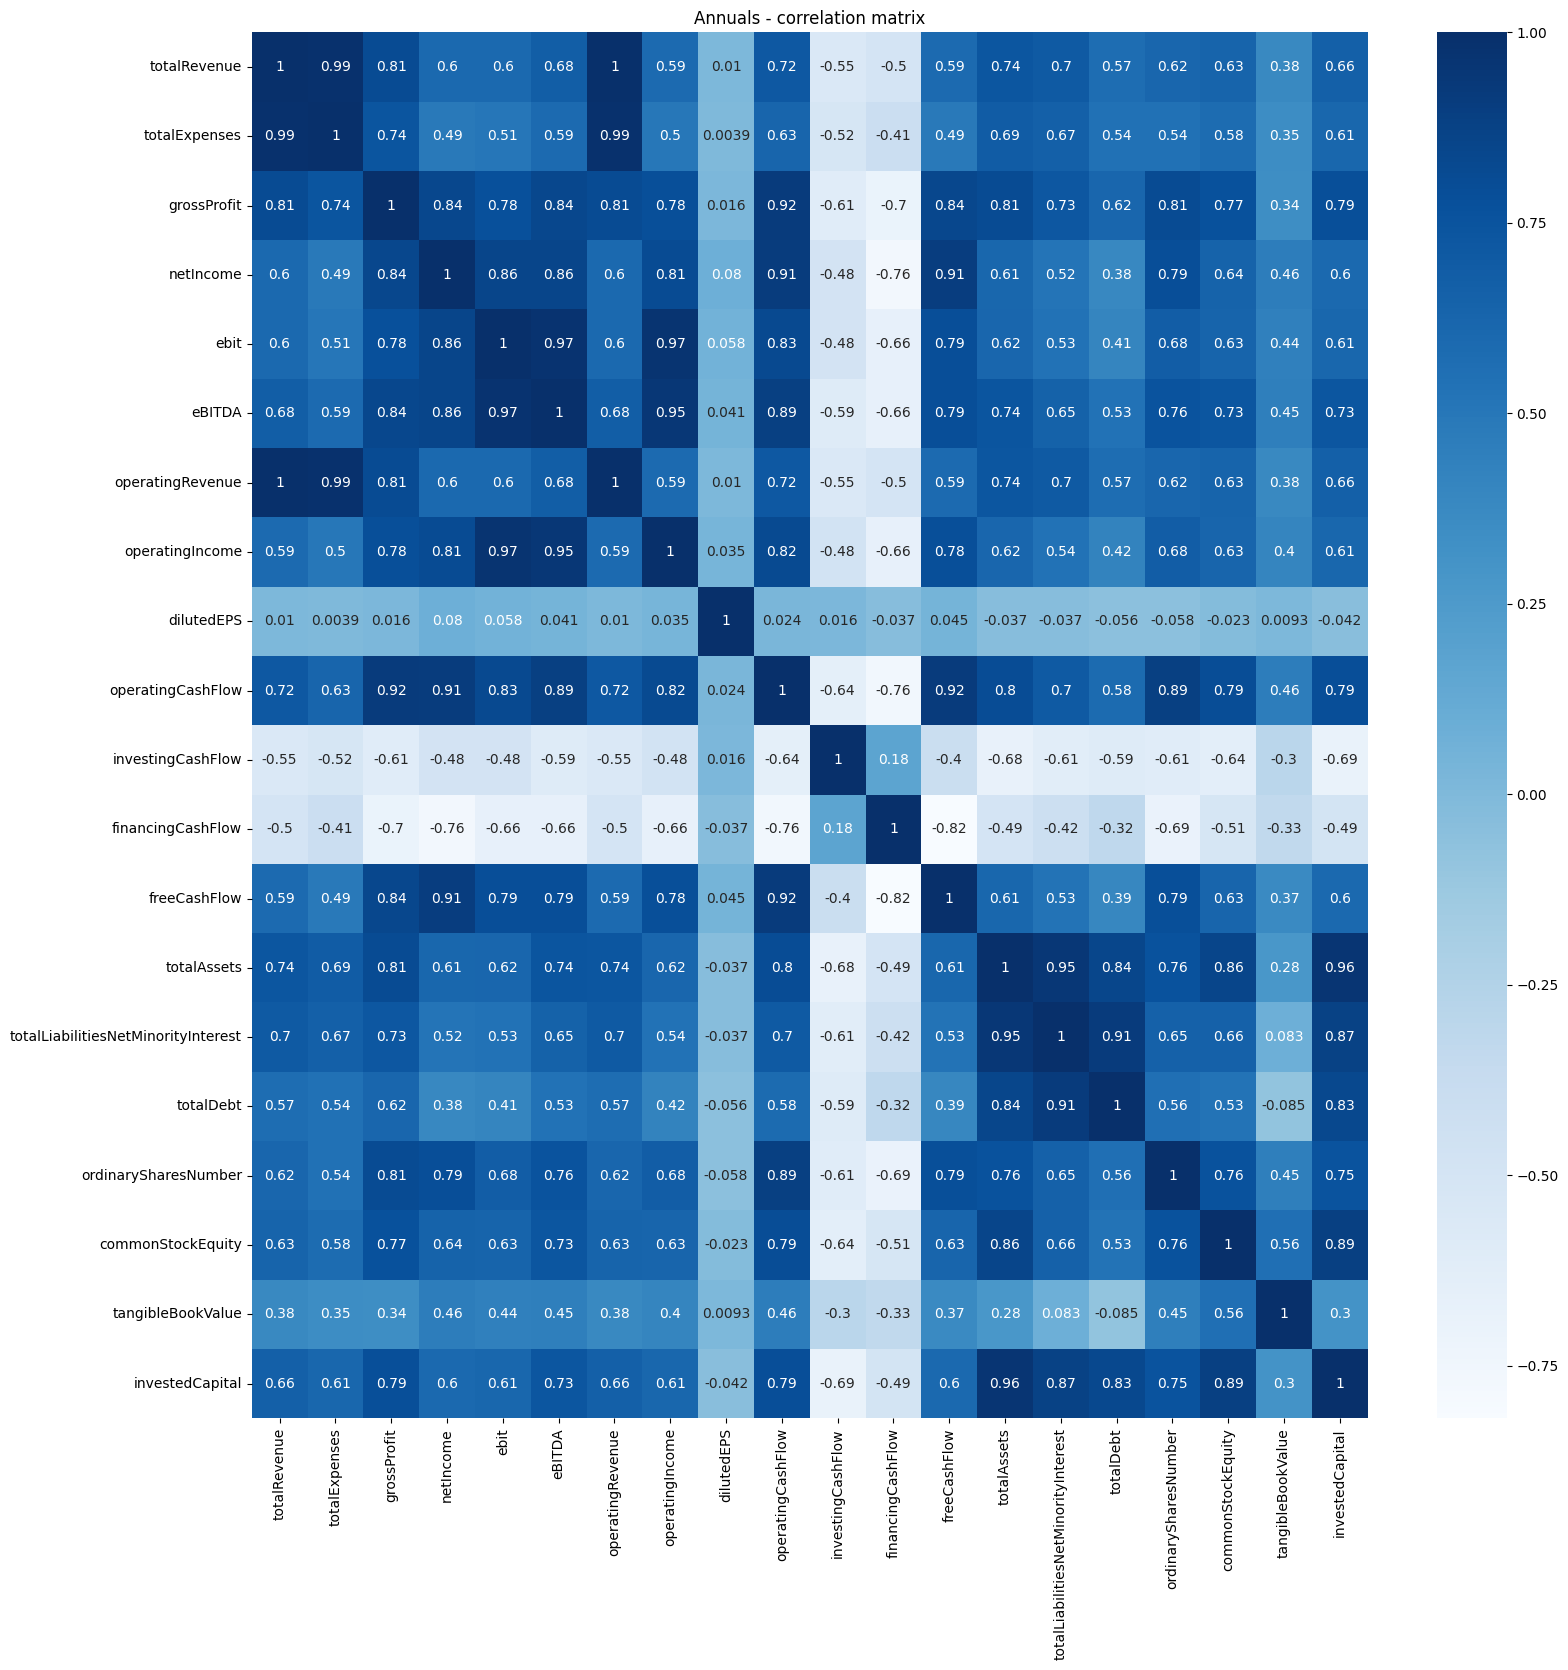

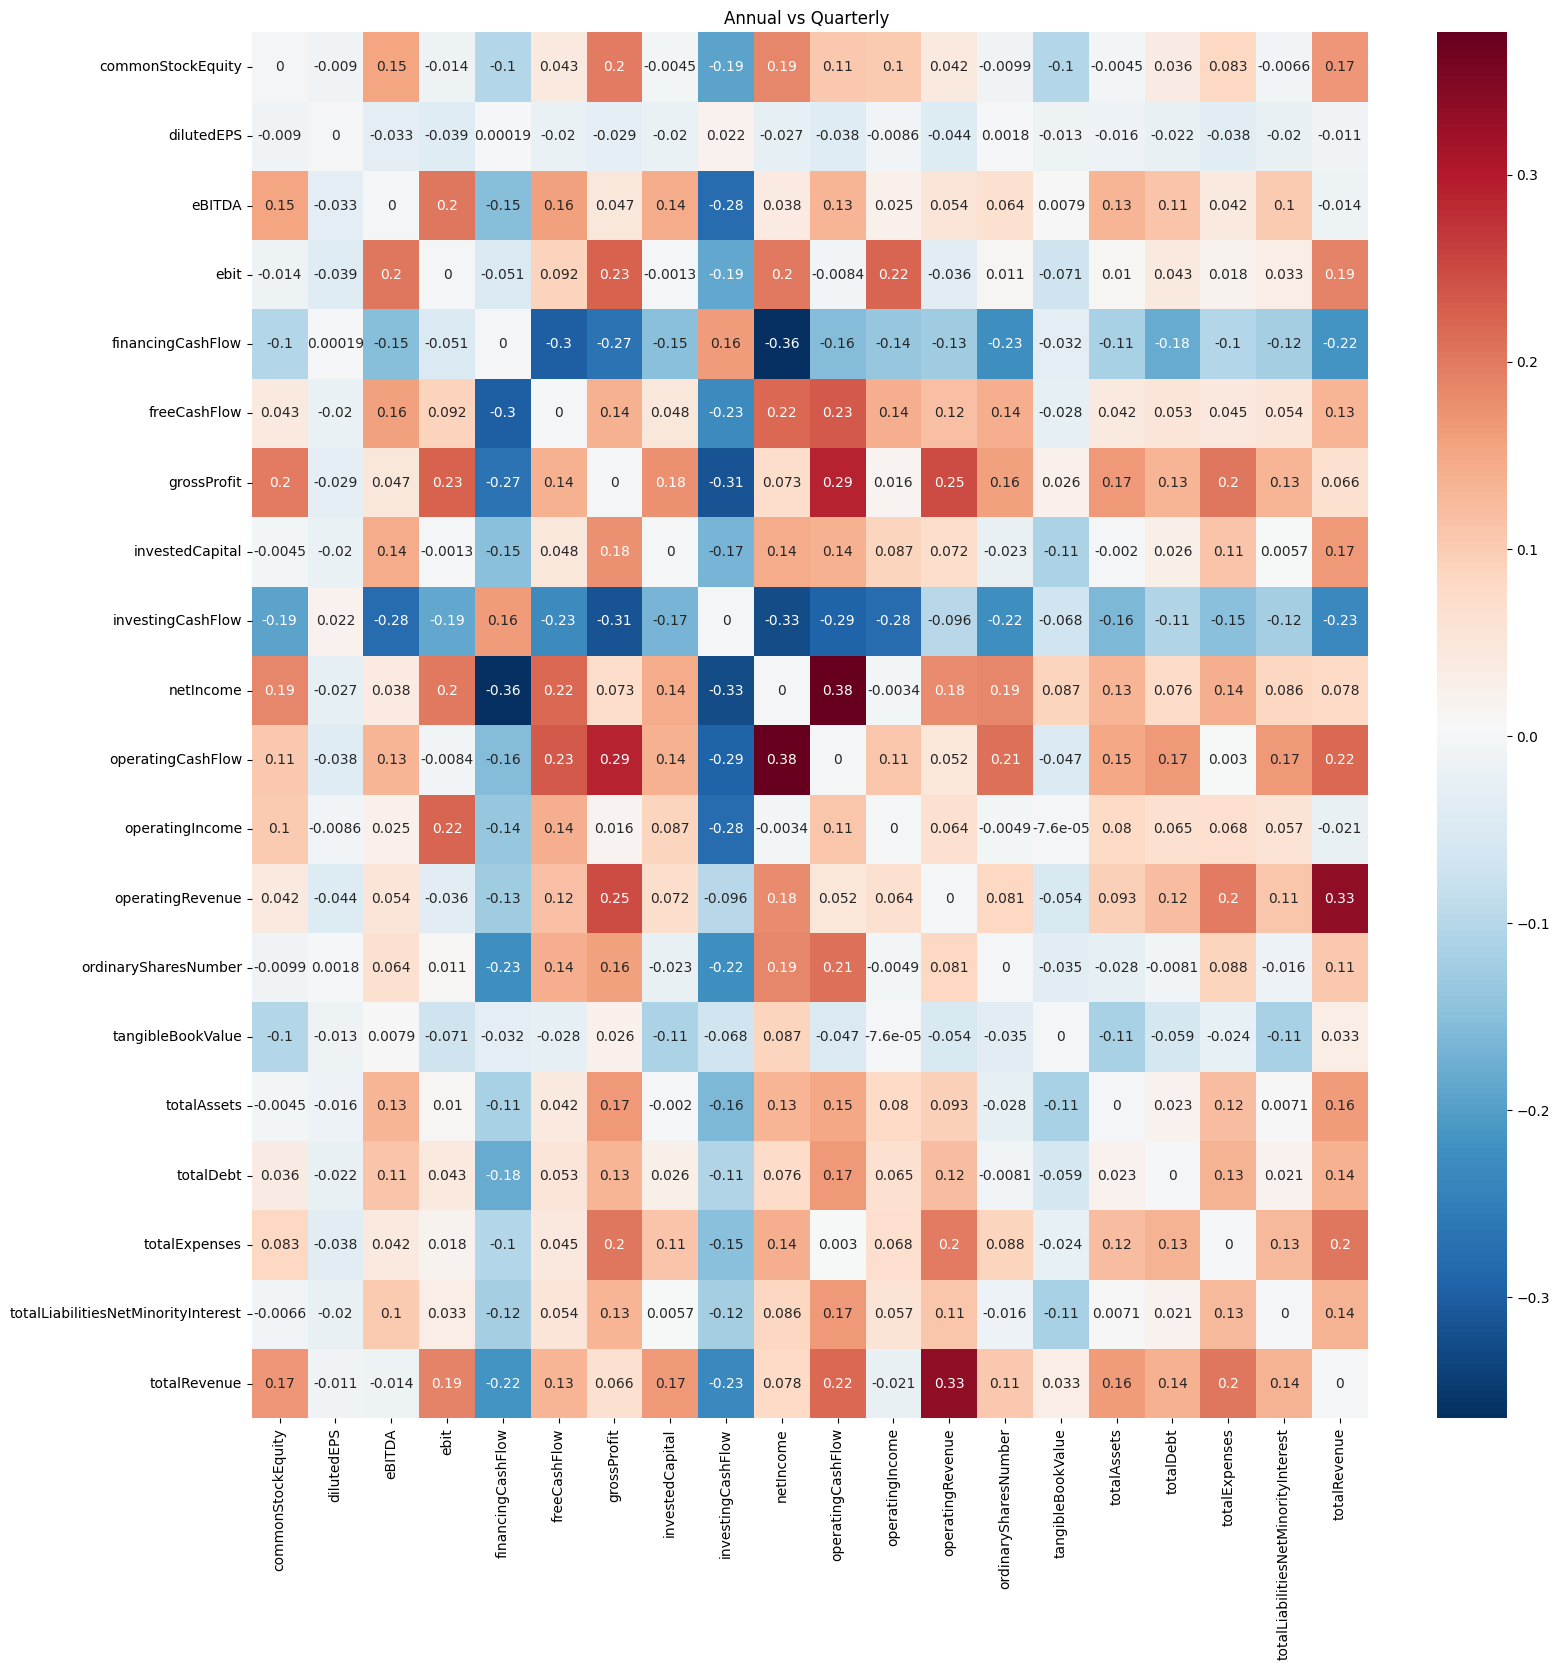

In [13]:
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(quarter_corr, annot=True, cmap="Blues", ax=ax)
plt.title("Quarters - correlation matrix")
plt.show()

fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(annual_corr, annot=True, cmap="Blues", ax=ax)
plt.title("Annuals - correlation matrix")
plt.show()

fig, ax = plt.subplots(figsize=(18,18))
i_diff = annual_corr - quarter_corr
sns.heatmap(i_diff, annot=True, cmap="RdBu_r", ax=ax)
plt.title("Annual vs Quarterly ")
plt.show()

In [14]:
pip install yahoofinancials

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
quarter_df

,timestamp,ticker,totalRevenue,totalExpenses,grossProfit,netIncome,ebit,eBITDA,operatingRevenue,operatingIncome,...,totalLiabilitiesNetMinorityInterest,totalDebt,ordinarySharesNumber,commonStockEquity,tangibleBookValue,investedCapital,operatingCashFlow,investingCashFlow,financingCashFlow,freeCashFlow
0,1690754400,A,1.672000e+09,1.539000e+09,6.580000e+08,111000000.0,1.470000e+09,2.270000e+08,1.672000e+09,133000000.0,...,5.117000e+09,2.789000e+09,292747000.0,5.558000e+09,1.072000e+09,8.347000e+09,1.704000e+09,-89000000.0,-1.070000e+09,1.420000e+09
1,1667170800,A,1.849000e+09,1.378000e+09,1.012000e+09,368000000.0,4.780000e+08,5.510000e+08,1.849000e+09,471000000.0,...,5.227000e+09,2.769000e+09,295000000.0,5.289000e+09,5.160000e+08,8.058000e+09,4.480000e+08,-110000000.0,-3.410000e+08,3.780000e+08
2,1675119600,A,1.756000e+09,1.330000e+09,9.680000e+08,352000000.0,4.350000e+08,5.020000e+08,1.756000e+09,426000000.0,...,5.310000e+09,2.971000e+09,296000000.0,5.609000e+09,8.160000e+08,8.580000e+09,2.960000e+08,-104000000.0,-1.700000e+07,2.200000e+08
3,1682805600,A,1.717000e+09,1.334000e+09,9.240000e+08,302000000.0,4.010000e+08,4.720000e+08,1.717000e+09,383000000.0,...,5.011000e+09,2.733000e+09,295000000.0,5.781000e+09,1.003000e+09,8.514000e+09,3.980000e+08,-77000000.0,-3.900000e+08,3.410000e+08
4,1664488800,AAL,1.346200e+10,1.253200e+10,2.824000e+09,483000000.0,1.157000e+09,1.157000e+09,1.267500e+10,930000000.0,...,7.454500e+10,4.468200e+10,649863026.0,-7.893000e+09,-1.405300e+10,2.904100e+10,-5.930000e+08,784000000.0,-2.520000e+08,-1.166000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,1664488800,ZTS,2.002000e+09,1.279000e+09,1.395000e+09,529000000.0,7.200000e+08,8.350000e+08,2.002000e+09,723000000.0,...,9.012000e+09,6.749000e+09,466442095.0,4.663000e+09,6.520000e+08,1.122600e+10,5.260000e+08,-124000000.0,-5.290000e+08,3.720000e+08
2142,1672441200,ZTS,2.040000e+09,1.350000e+09,1.387000e+09,461000000.0,6.540000e+08,6.890000e+08,2.040000e+09,690000000.0,...,1.052200e+10,8.090000e+09,463808059.0,4.405000e+09,2.790000e+08,1.230900e+10,7.410000e+08,-438000000.0,7.800000e+08,5.700000e+08
2143,1680213600,ZTS,2.000000e+09,1.272000e+09,1.412000e+09,552000000.0,7.600000e+08,7.970000e+08,2.000000e+09,728000000.0,...,9.263000e+09,6.742000e+09,462495343.0,4.494000e+09,4.420000e+08,1.105600e+10,5.490000e+08,-216000000.0,-1.802000e+09,3.260000e+08
2144,1688076000,ZTS,2.180000e+09,1.346000e+09,1.573000e+09,671000000.0,9.300000e+08,9.670000e+08,2.180000e+09,834000000.0,...,9.128000e+09,6.745000e+09,460750652.0,4.625000e+09,6.590000e+08,1.118200e+10,1.830000e+08,-80000000.0,-4.940000e+08,1.700000e+07


In [16]:
quarter_df['timestamp'].unique()

array(['1690754400', '1667170800', '1675119600', '1682805600',
       '1664488800', '1672441200', '1680213600', '1696024800',
       '1688076000', '1661896800', '1669762800', '1677538800',
       '1685484000', '1693432800', '1698706800'], dtype=object)

In [20]:
# Pobieranie informacji giełdowych do jednego datasetu (20s)

from yahoofinancials import YahooFinancials
import datetime
import time


stocks_df = pd.DataFrame()
min = str(datetime.date.fromtimestamp(int(quarter_df['timestamp'].min())))
max = str(datetime.date.fromtimestamp(int(quarter_df['timestamp'].max())))

for ticker in tickers:
    company = YahooFinancials(ticker)
    data = company.get_historical_price_data(min, max, "monthly")

    if 'prices' in data[ticker]:
      prices = [item for item in data[ticker]['prices']]
      cols = ["adjclose", "close", "date", "high", "low", "open", "volume"]

      df_stock = pd.DataFrame(prices, columns=cols)
      df_stock['ticker'] = ticker

      stocks_df = pd.concat([stocks_df, df_stock], ignore_index=True)


In [ ]:
stocks_df

NameError: name 'stocks_df' is not defined

In [ ]:
stocks_df.to_csv("stocks.csv", index=False, encoding='utf-8')

In [ ]:
quarter_full_df = quarter_df.copy()
quarter_full_df = pd.merge(quarter_full_df, stocks_df, on="ticker", how="left")
quarter_full_df['timestamp'] = pd.to_datetime(quarter_full_df['timestamp'], unit='s')
quarter_full_df['date'] = pd.to_datetime(quarter_full_df['date'], unit='s')

# Merge po dacie, ten sam rok i ten sam miesiac
quarter_full_df = quarter_full_df.query("timestamp.dt.year == date.dt.year & timestamp.dt.month == date.dt.month")
quarter_full_df = quarter_full_df.drop(['date'], axis=1)

In [ ]:
quarter_full_df = quarter_full_df.query("timestamp.dt.year == date.dt.year & timestamp.dt.month == date.dt.month")

In [ ]:
quarter_full_df

In [ ]:
quarter_corr_full = quarter_full_df[2:].corr()

In [ ]:
quarter_corr_full

In [ ]:
def elementy_nietypowe(param, pq1, pq2):
  q1 = quarter_full_df[param].quantile(pq1)
  q3 = quarter_full_df[param].quantile(pq2)

  iqr = q3 - q1
  low = q1 - (1.5 * iqr)
  hig = q3 + (1.5 * iqr)

  outliers = quarter_full_df[(quarter_full_df[param] < low) | (quarter_full_df[param] > hig)][param]
  norm = quarter_full_df[(quarter_full_df[param] >= low) & (quarter_full_df[param] <= hig)][param]


  plt.rcParams['lines.linewidth'] = 3
  plt.plot(norm, norm*0, '|', color='DeepSkyBlue', ms=28)
  plt.plot(outliers, outliers*0, '|', color='red', ms=28)
  ax = plt.gca()
  ax.set_facecolor('white')
  plt.xlabel(param)
  plt.ylabel('Wartość')
  plt.grid(True)
  plt.title('Elementy nietypowe: ' + param + ', q1 = ' + str(pq1) + ' q2 = ' + str(pq2))
  plt.show()

In [18]:
from itertools import islice

for name, values in islice(quarter_full_df.items(), 2, None):
  elementy_nietypowe(name, 0.25, 0.75)
  elementy_nietypowe(name, 0.1, 0.9)
  print('-------------------------------------------------------------------------------------------------')

NameError: name 'quarter_full_df' is not defined

In [ ]:
elementy_nietypowe('totalDebt')